# Optimization of the original letter frequencies program
Here we explore the data created by our benchmark. So first we will read the CSV file generated by our benchmark.

In [5]:
# !py -m pip install pandas
# !py -m pip install numpy
# !py -m pip install matplotlib
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# read the time data
data = pd.read_csv('../time_data/multiple_run_real_times_new.csv')
data

,init,tally,print
0,0.1640,20.2919,2.1919
1,0.1609,20.5795,2.3499
2,0.1636,20.4379,2.4464
3,0.1638,20.6242,2.0340
4,0.1689,20.5549,2.1590
...,...,...,...
495,0.1390,20.4165,2.2384
496,0.1599,20.1329,1.9211
497,0.1354,20.2176,2.0996
498,0.1286,20.1811,1.9819


## Explore the data

In [6]:
data.shape

(500, 3)

In [7]:
data.describe()

,init,tally,print
count,500.000000,500.000000,500.000000
mean,0.130421,20.403799,2.262527
std,0.068740,0.377011,0.245607
min,0.067700,19.786900,1.804800
25%,0.090175,20.188100,2.070050
50%,0.113200,20.367200,2.236350
75%,0.160625,20.496425,2.408350
max,1.129800,22.740600,3.334600


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   init    500 non-null    float64
 1   tally   500 non-null    float64
 2   print   500 non-null    float64
dtypes: float64(3)
memory usage: 11.8 KB


## Show a histogram

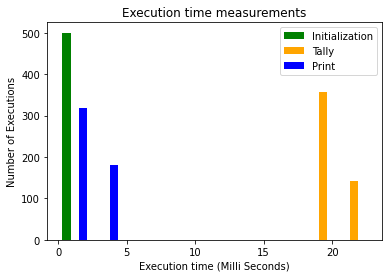

In [9]:

#data.hist()
plt.hist([data.init, data.tally, data.print], align=('mid'), color=['green', 'orange', 'blue'], label=['Initialization','Tally','Print'])
plt.title("Execution time measurements")
plt.xlabel("Execution time (Milli Seconds)")
plt.ylabel("Number of Executions")
plt.legend()

plt.show()



As it is visible from the histogram above, it's the tally algoritm takes remakably less time than it did before the optimization. Futher analysis will tell how much. 

count    500.000000
mean      22.796748
std        0.520770
min       21.971600
25%       22.494275
50%       22.730000
75%       22.956325
max       26.145500
dtype: float64


<AxesSubplot:>

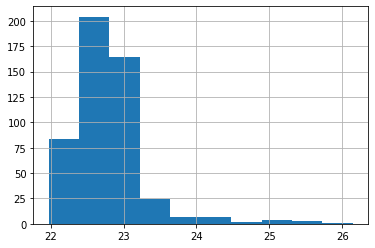

In [10]:
full_time = data.init + data.tally + data.print
print(full_time.describe())
full_time.hist()

It is now visible that most of the execution times lie around the mean, witch was calculated to (0.098083 + 20.720719 + 2.496320) = 23.315122. We can also see that the times "spread" out a lot less, witch is also visible from the std. dev. of just 0.346686 ms. on the combined times. 

To find out much time each part of the program is responsible for, we've plottet a pie chart of the different parts of the program. 

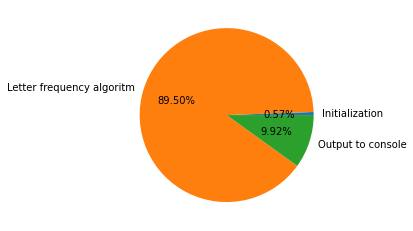

In [11]:
mean_array = [data['init'].sum(), data['tally'].sum(), data['print'].sum()]

plt.figure()
plt.pie(mean_array, labels=['Initialization', 'Letter frequency algoritm', 'Output to console'], autopct='%1.2f%%')
plt.show()

It's visible from this chart that the tally algorithm is accountable for 88.87 % of the execution time. Compared to the 93.4 % from the original we can say 
that the output to console is now closer to the algoritms times, this basicly just means that we've optimized that tally algorithm more than the print_tally method.

# Boxplot
A boxplot is a great way to show benchmark results and compare them later on.

## Boxplot of the three different timings
Here is a boxplot containing all the times in three different boxes, so it's possible to compare the results. The times in the plot are not directly compareable, since they are measuring different parts of the program, it is mostly used to paint a picture of how the times are spread out and show the outliers of this perticular dataset.

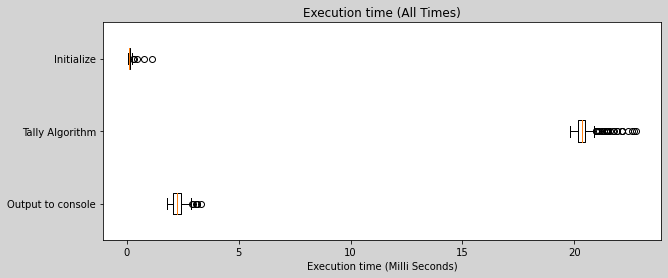

In [12]:
plt.figure(figsize=[10,4],facecolor='lightgray')
plt.boxplot(data, labels=['Initialize', 'Tally Algorithm', 'Output to console'], vert=False, positions=range(4,1,-1))
plt.title("Execution time (All Times)")
plt.xlabel("Execution time (Milli Seconds)")
plt.show()


### Initialize
The initialization is still very fast and very stable, as expected.

### Tally
The tally algorithm has drop down drasticly in execution time, from around 40-41 ms. to now around 21-22 ms. 
A boxplot of just this algoritms times can be found further down in this notebook.

### Output to console
It's visible from the boxplot, that the output algoritm run relatively fast (around 2-3 ms). It's about the same the as before the optimization. We expected more reduction in this part of the program, it could be due to the time actually representing the time it takes to print it in console, and not the actual algoritms runtime. 

# Boxplot of the Tally algoritm

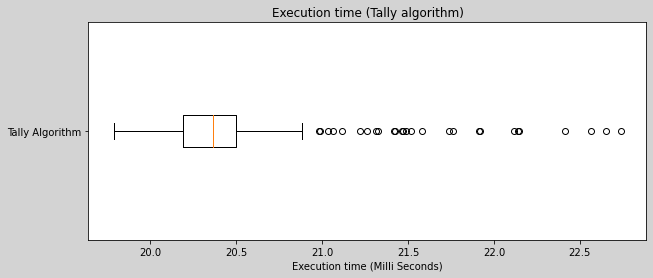

In [13]:
plt.figure(figsize=[10,4],facecolor='lightgray')
plt.boxplot(data['tally'], labels=['Tally Algorithm'], vert=False)
plt.title("Execution time (Tally algorithm)")
plt.xlabel("Execution time (Milli Seconds)")
plt.show()

This is a close up of the most time consuming part of the program. It's clearly visible that the algoritm is much faster than before the optimization. A comparisson will show how much later on.

# Boxplot of the combined times
Underneath is a boxplot of the combined execution times of the 500 runs. 

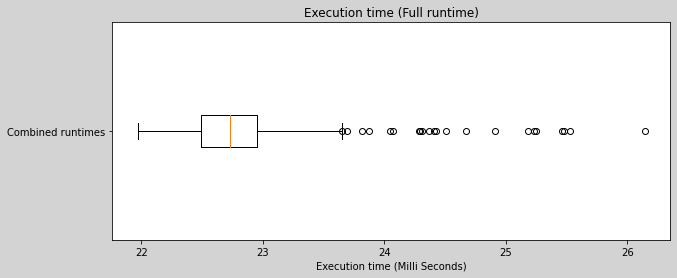

In [14]:
plt.figure(figsize=[10,4],facecolor='lightgray')
plt.boxplot(full_time, labels=['Combined runtimes'], vert=False)
plt.title("Execution time (Full runtime)")
plt.xlabel("Execution time (Milli Seconds)")
plt.show()

Compared quickly to the 41-43 ms we saw before the optimization, these result are much better. It runs much faster, and vary less than it did before. A combined boxplot will show light on how much.

In [15]:
# detecting the outliers for the three times
# Here we are finding the outliers, using the z-score

def detect_outlier(data_1):
    outliers=[]
    
    threshold=3
    mean_1 = np.mean(data_1)
    std_1 =np.std(data_1)
    
    
    for y in data_1:
        z_score= (y - mean_1)/std_1 
        if np.abs(z_score) > threshold:
            outliers.append(y)
    return outliers

outliers = detect_outlier(data.tally)
print(outliers)
data.tally.sort_values().tail(15)

[22.1456, 21.9189, 21.9126, 22.6554, 22.7406, 22.14, 22.1172, 22.5673, 21.5814, 21.7375, 22.4126, 21.7627]


483    21.4729
412    21.4897
325    21.5148
414    21.5814
435    21.7375
484    21.7627
93     21.9126
34     21.9189
256    22.1172
177    22.1400
13     22.1456
457    22.4126
344    22.5673
133    22.6554
157    22.7406
Name: tally, dtype: float64

In [16]:
outliers = detect_outlier(data.init)
print(outliers)
data.init.sort_values().tail(15)

[0.4699, 1.1298, 0.7717]


181    0.2157
163    0.2168
13     0.2184
184    0.2211
8      0.2260
22     0.2281
221    0.2366
208    0.2368
177    0.2426
235    0.2541
206    0.2840
157    0.3115
12     0.4699
265    0.7717
47     1.1298
Name: init, dtype: float64

In [17]:
outliers = detect_outlier(data.print)
print(outliers)
data.print.sort_values().tail(15)

[3.1176, 3.3346, 3.151, 3.1587, 3.0934]


33     2.8087
180    2.8129
66     2.8226
168    2.8425
412    2.8501
305    2.8561
177    2.8633
113    2.8915
206    2.9215
388    2.9381
157    3.0934
13     3.1176
93     3.1510
126    3.1587
34     3.3346
Name: print, dtype: float64